## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import tensorflow.keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = tensorflow.keras.layers.Input([x_train.shape[-1]])
    x = tensorflow.keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = tensorflow.keras.layers.Dense(units=256, activation="relu")(x)
    x = tensorflow.keras.layers.Dense(units=128, activation="relu")(x)
    out = tensorflow.keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 228us/sample - loss: 2.2735 - accuracy: 0.1500 - val_loss: 2.2299 - val_accuracy: 0.2039
Epoch 2/500
50000/50000 [==============================] - 10s 201us/sample - loss: 2.2002 - accuracy: 0.2206 - val_loss: 2.1747 - val_accuracy: 0.2386
Epoch 3/500
50000/50000 [==============================] - 11s 211us/sample - loss: 2.1525 - accuracy: 0.2450 - val_loss: 2.1319 - val_accuracy: 0.2540
Epoch 4/500
50000/50000 [==============================] - 10s 192us/sample - loss: 2.1131 - accuracy: 0.2635 - val_loss: 2.0949 - val_accuracy: 0.2729
Epoch 5/500
50000/50000 [==============================] - 9s 183us/sample - loss: 2.0785 - accuracy: 0.2778 - val_loss: 2.0625 - val_accuracy: 0.2859
Epoch 6/500
50000/50000 [==============================] - 9s 181us/sample - loss: 2.0476 - accuracy: 0.2905 - val_loss: 2.0328 - val_accuracy: 0.2952
Epoch 7/500
50000/50000 [===============

50000/50000 [==============================] - 9s 177us/sample - loss: 1.6735 - accuracy: 0.4192 - val_loss: 1.6806 - val_accuracy: 0.4150
Epoch 55/500
50000/50000 [==============================] - 9s 177us/sample - loss: 1.6702 - accuracy: 0.4207 - val_loss: 1.6735 - val_accuracy: 0.4166
Epoch 56/500
50000/50000 [==============================] - 9s 176us/sample - loss: 1.6667 - accuracy: 0.4206 - val_loss: 1.6711 - val_accuracy: 0.4198
Epoch 57/500
50000/50000 [==============================] - 9s 175us/sample - loss: 1.6635 - accuracy: 0.4221 - val_loss: 1.6684 - val_accuracy: 0.4189
Epoch 58/500
50000/50000 [==============================] - 9s 178us/sample - loss: 1.6603 - accuracy: 0.4231 - val_loss: 1.6645 - val_accuracy: 0.4176
Epoch 59/500
50000/50000 [==============================] - 9s 179us/sample - loss: 1.6572 - accuracy: 0.4245 - val_loss: 1.6630 - val_accuracy: 0.4198
Epoch 60/500
50000/50000 [==============================] - 9s 175us/sample - loss: 1.6541 - accuracy

Epoch 108/500
50000/50000 [==============================] - 9s 183us/sample - loss: 1.5332 - accuracy: 0.4669 - val_loss: 1.5559 - val_accuracy: 0.4521
Epoch 109/500
50000/50000 [==============================] - 9s 183us/sample - loss: 1.5314 - accuracy: 0.4668 - val_loss: 1.5535 - val_accuracy: 0.4543
Epoch 110/500
50000/50000 [==============================] - 9s 184us/sample - loss: 1.5296 - accuracy: 0.4670 - val_loss: 1.5554 - val_accuracy: 0.4535
Epoch 111/500
50000/50000 [==============================] - 9s 182us/sample - loss: 1.5274 - accuracy: 0.4676 - val_loss: 1.5517 - val_accuracy: 0.4524
Epoch 112/500
50000/50000 [==============================] - 9s 182us/sample - loss: 1.5252 - accuracy: 0.4687 - val_loss: 1.5500 - val_accuracy: 0.4531
Epoch 113/500
50000/50000 [==============================] - 9s 181us/sample - loss: 1.5234 - accuracy: 0.4697 - val_loss: 1.5529 - val_accuracy: 0.4522
Epoch 114/500
50000/50000 [==============================] - 9s 180us/sample - los

50000/50000 [==============================] - 9s 189us/sample - loss: 1.4425 - accuracy: 0.4959 - val_loss: 1.4861 - val_accuracy: 0.4756
Epoch 162/500
50000/50000 [==============================] - 9s 187us/sample - loss: 1.4408 - accuracy: 0.4981 - val_loss: 1.4889 - val_accuracy: 0.4765
Epoch 163/500
50000/50000 [==============================] - 9s 188us/sample - loss: 1.4392 - accuracy: 0.4979 - val_loss: 1.4842 - val_accuracy: 0.4715
Epoch 164/500
50000/50000 [==============================] - 9s 176us/sample - loss: 1.4382 - accuracy: 0.4985 - val_loss: 1.4824 - val_accuracy: 0.4745
Epoch 165/500
50000/50000 [==============================] - 9s 180us/sample - loss: 1.4366 - accuracy: 0.4988 - val_loss: 1.4823 - val_accuracy: 0.4721
Epoch 166/500
50000/50000 [==============================] - 9s 180us/sample - loss: 1.4350 - accuracy: 0.4983 - val_loss: 1.4794 - val_accuracy: 0.4731
Epoch 167/500
50000/50000 [==============================] - 9s 176us/sample - loss: 1.4333 - ac

50000/50000 [==============================] - 9s 173us/sample - loss: 1.3680 - accuracy: 0.5216 - val_loss: 1.4377 - val_accuracy: 0.4862
Epoch 215/500
50000/50000 [==============================] - 9s 174us/sample - loss: 1.3663 - accuracy: 0.5223 - val_loss: 1.4496 - val_accuracy: 0.4835
Epoch 216/500
50000/50000 [==============================] - 9s 175us/sample - loss: 1.3653 - accuracy: 0.5235 - val_loss: 1.4400 - val_accuracy: 0.4850
Epoch 217/500
50000/50000 [==============================] - 9s 179us/sample - loss: 1.3639 - accuracy: 0.5223 - val_loss: 1.4398 - val_accuracy: 0.4874
Epoch 218/500
50000/50000 [==============================] - 9s 178us/sample - loss: 1.3630 - accuracy: 0.5237 - val_loss: 1.4339 - val_accuracy: 0.4884
Epoch 219/500
50000/50000 [==============================] - 9s 177us/sample - loss: 1.3612 - accuracy: 0.5234 - val_loss: 1.4312 - val_accuracy: 0.4936
Epoch 220/500
50000/50000 [==============================] - 9s 177us/sample - loss: 1.3596 - ac

50000/50000 [==============================] - 9s 177us/sample - loss: 1.2994 - accuracy: 0.5459 - val_loss: 1.4086 - val_accuracy: 0.4972
Epoch 268/500
50000/50000 [==============================] - 9s 182us/sample - loss: 1.2992 - accuracy: 0.5455 - val_loss: 1.3995 - val_accuracy: 0.5033
Epoch 269/500
50000/50000 [==============================] - 9s 171us/sample - loss: 1.2967 - accuracy: 0.5470 - val_loss: 1.3955 - val_accuracy: 0.5022
Epoch 270/500
50000/50000 [==============================] - 9s 177us/sample - loss: 1.2954 - accuracy: 0.5468 - val_loss: 1.4009 - val_accuracy: 0.4995
Epoch 271/500
50000/50000 [==============================] - 22s 450us/sample - loss: 1.2952 - accuracy: 0.5474 - val_loss: 1.4024 - val_accuracy: 0.4995
Epoch 272/500
50000/50000 [==============================] - 47s 932us/sample - loss: 1.2934 - accuracy: 0.5485 - val_loss: 1.4022 - val_accuracy: 0.4971
Epoch 273/500
50000/50000 [==============================] - 47s 940us/sample - loss: 1.2922 -

Epoch 321/500
50000/50000 [==============================] - 5s 94us/sample - loss: 1.2352 - accuracy: 0.5695 - val_loss: 1.3750 - val_accuracy: 0.5087
Epoch 322/500
50000/50000 [==============================] - 5s 102us/sample - loss: 1.2351 - accuracy: 0.5687 - val_loss: 1.3783 - val_accuracy: 0.5073
Epoch 323/500
50000/50000 [==============================] - 5s 96us/sample - loss: 1.2328 - accuracy: 0.5696 - val_loss: 1.3690 - val_accuracy: 0.5137
Epoch 324/500
50000/50000 [==============================] - 5s 96us/sample - loss: 1.2323 - accuracy: 0.5696 - val_loss: 1.4027 - val_accuracy: 0.5044
Epoch 325/500
50000/50000 [==============================] - 5s 104us/sample - loss: 1.2311 - accuracy: 0.5713 - val_loss: 1.3677 - val_accuracy: 0.5124
Epoch 326/500
50000/50000 [==============================] - 6s 115us/sample - loss: 1.2304 - accuracy: 0.5698 - val_loss: 1.3872 - val_accuracy: 0.5066
Epoch 327/500
50000/50000 [==============================] - 5s 97us/sample - loss: 1

Epoch 375/500
50000/50000 [==============================] - 5s 106us/sample - loss: 1.1750 - accuracy: 0.5902 - val_loss: 1.3524 - val_accuracy: 0.5206
Epoch 376/500
50000/50000 [==============================] - 6s 111us/sample - loss: 1.1746 - accuracy: 0.5901 - val_loss: 1.3615 - val_accuracy: 0.5143
Epoch 377/500
50000/50000 [==============================] - 5s 94us/sample - loss: 1.1727 - accuracy: 0.5903 - val_loss: 1.3774 - val_accuracy: 0.5114
Epoch 378/500
50000/50000 [==============================] - 4s 87us/sample - loss: 1.1719 - accuracy: 0.5910 - val_loss: 1.3530 - val_accuracy: 0.5174
Epoch 379/500
50000/50000 [==============================] - 4s 88us/sample - loss: 1.1698 - accuracy: 0.5927 - val_loss: 1.3758 - val_accuracy: 0.5147
Epoch 380/500
50000/50000 [==============================] - 5s 100us/sample - loss: 1.1695 - accuracy: 0.5931 - val_loss: 1.3977 - val_accuracy: 0.5037
Epoch 381/500
50000/50000 [==============================] - 4s 87us/sample - loss: 1

Epoch 429/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.1154 - accuracy: 0.6125 - val_loss: 1.3393 - val_accuracy: 0.5227
Epoch 430/500
50000/50000 [==============================] - 5s 91us/sample - loss: 1.1147 - accuracy: 0.6135 - val_loss: 1.3534 - val_accuracy: 0.5213
Epoch 431/500
50000/50000 [==============================] - 5s 91us/sample - loss: 1.1145 - accuracy: 0.6103 - val_loss: 1.3389 - val_accuracy: 0.5225
Epoch 432/500
50000/50000 [==============================] - 5s 91us/sample - loss: 1.1131 - accuracy: 0.6122 - val_loss: 1.3895 - val_accuracy: 0.5121
Epoch 433/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.1135 - accuracy: 0.6127 - val_loss: 1.3542 - val_accuracy: 0.5183
Epoch 434/500
50000/50000 [==============================] - 5s 93us/sample - loss: 1.1100 - accuracy: 0.6131 - val_loss: 1.3502 - val_accuracy: 0.5232
Epoch 435/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.11

Epoch 483/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.0603 - accuracy: 0.6296 - val_loss: 1.3500 - val_accuracy: 0.5226
Epoch 484/500
50000/50000 [==============================] - 4s 89us/sample - loss: 1.0597 - accuracy: 0.6314 - val_loss: 1.3605 - val_accuracy: 0.5212
Epoch 485/500
50000/50000 [==============================] - 4s 90us/sample - loss: 1.0572 - accuracy: 0.6314 - val_loss: 1.3768 - val_accuracy: 0.5166
Epoch 486/500
50000/50000 [==============================] - 4s 88us/sample - loss: 1.0577 - accuracy: 0.6305 - val_loss: 1.3563 - val_accuracy: 0.5210
Epoch 487/500
50000/50000 [==============================] - 5s 92us/sample - loss: 1.0562 - accuracy: 0.6319 - val_loss: 1.3450 - val_accuracy: 0.5235
Epoch 488/500
50000/50000 [==============================] - 9s 172us/sample - loss: 1.0541 - accuracy: 0.6329 - val_loss: 1.3436 - val_accuracy: 0.5244
Epoch 489/500
50000/50000 [==============================] - 5s 103us/sample - loss: 1.

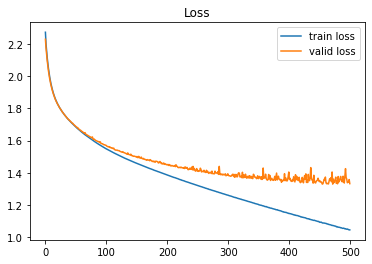

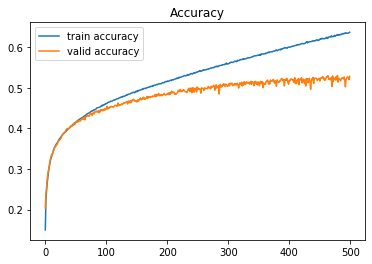

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()